In [1383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1384]:
new=pd.read_excel('average salary.xlsx')

In [1385]:
pd.set_option('display.max_rows', 61)

pd.set_option('display.max_columns', 15)

In [1386]:
new

,Country,cost of living.Rank,cost of living.Cost index,cost of living.Monthly income (USD),cost of living.Purchasing power index,currency rate.2023,"GDP (in USD) per capita by country, territory, non-sovereign state or non-IMF .1",population.Population (2023),population.Migrants (net),Skilled force.2023,technology.2023 rank,Unemployement rate.Unemploymentrate (%),inflation.Inflation,Monthly salary+Tax(USD),Literacy rate
0,Albania,55,47.9,631,19.7,3.297,8368,2791765,-24472,1387831,88,11.00,1.90,634.13,99.50
1,Algeria,89,30.7,413,20.1,4.184,5260,46814308,-31240,13425064,97,12.70,4.56,228.37,74.00
2,Australia,17,96.4,5262,81.6,2.063,64712,26713205,138510,14501414,12,4.21,2.80,3678.75,99.00
3,Austria,27,80.9,4589,84.8,-0.746,56506,9120813,8813,4825387,24,5.40,1.80,2579.59,98.00
4,Azerbaijan,84,31.3,557,26.6,1.100,7155,10336577,10864,5473196,96,5.52,3.50,456.50,99.90
5,Bangladesh,95,28.5,238,12.5,6.025,2529,173562364,-473362,74913612,126,5.20,9.92,239.43,94.80
6,Belarus,94,29.3,648,33.0,3.882,7829,9056696,-3119,4956149,55,3.04,6.00,522.44,99.90
7,Belgium,25,83.7,4544,81.1,1.461,53475,11738763,36243,5432007,10,5.51,3.20,2563.22,99.00
8,Brazil,51,49.8,756,22.7,2.908,10044,211998573,-225510,108695239,40,7.50,4.76,414.62,99.30
9,Bulgaria,60,43.3,1205,41.6,1.846,15798,6757689,524,3102757,43,4.30,1.20,1011.33,98.10


In [1387]:
new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Country                                                                           61 non-null     object 
 1   cost of living.Rank                                                               61 non-null     int64  
 2   cost of living.Cost index                                                         61 non-null     float64
 3   cost of living.Monthly income (USD)                                               61 non-null     int64  
 4   cost of living.Purchasing power index                                             61 non-null     float64
 5   currency rate.2023                                                                60 non-null     float64
 6   GDP 

In [1388]:
rename_col={'cost of living.Rank':'cost of living','cost of living.Cost index': 'cost index','cost of living.Monthly income':'Monthly income($)','cost of living.Purchasing power index':'Purchasing Power Index','currency rate.2023':'currency rate','GDP (in USD) per capita by country, territory, non-sovereign state or non-IMF .1':'Gdp','population.Population (2023)':'population', ' population.Migrants (net)':'migrants','Skilled force.2023':'Skilled force',' technology.2023 rank':'technology','Unemployement rate.Unemploymentrate (%)':'Unemployment(%)','inflation.Inflation':'Inflation(%)','Literacy rate':'Literacy rate(%)'}  

In [1389]:
new=new.rename(columns=rename_col)

In [1390]:
new.isnull().sum()

Country                                0
cost of living                         0
cost index                             0
cost of living.Monthly income (USD)    0
Purchasing Power Index                 0
currency rate                          1
Gdp                                    0
population                             0
population.Migrants (net)              0
Skilled force                          0
technology.2023 rank                   0
Unemployment(%)                        0
Inflation(%)                           0
Monthly salary+Tax(USD)                0
Literacy rate(%)                       0
dtype: int64

In [1391]:
new['currency rate'].fillna(12.1,inplace=True)

C:\Users\ajms\AppData\Local\Temp\ipykernel_18988\3293588455.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1392]:
new.isnull().sum()

Country                                0
cost of living                         0
cost index                             0
cost of living.Monthly income (USD)    0
Purchasing Power Index                 0
currency rate                          0
Gdp                                    0
population                             0
population.Migrants (net)              0
Skilled force                          0
technology.2023 rank                   0
Unemployment(%)                        0
Inflation(%)                           0
Monthly salary+Tax(USD)                0
Literacy rate(%)                       0
dtype: int64

What is the minimum wage in countries where it is higher than the average salary?

In [1393]:
avg_sal=new['Monthly salary+Tax(USD)'].mean()

In [1394]:
avg_sal

1504.7627868852455

In [1395]:
new1=new[avg_sal<new['Monthly salary+Tax(USD)']]

In [1396]:
new1

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
2,Australia,17,96.4,5262,81.6,2.063,64712,26713205,138510,14501414,12,4.21,2.80,3678.75,99.00
3,Austria,27,80.9,4589,84.8,-0.746,56506,9120813,8813,4825387,24,5.40,1.80,2579.59,98.00
7,Belgium,25,83.7,4544,81.1,1.461,53475,11738763,36243,5432007,10,5.51,3.20,2563.22,99.00
10,Canada,21,90.7,4494,74.1,1.066,53372,39742430,368599,22110473,11,6.32,1.60,2818.53,99.00
16,Denmark,10,103.9,6113,87.9,1.813,67967,5977412,25639,3179505,16,4.89,1.60,3596.29,99.00
19,Estonia,37,71.0,2270,47.8,-3.006,29824,1360546,-7742,752419,29,8.06,4.10,1525.26,100.00
20,Finland,22,90.2,4449,73.7,-0.957,53756,5617310,26894,2879817,8,7.60,0.80,2818.03,99.00
21,France,28,79.8,3756,70.4,0.869,44461,66548530,90527,31825317,15,7.36,1.20,2486.51,99.00
23,Germany,29,79.5,4498,84.6,-0.305,52746,84552242,36954,44783712,7,3.29,2.00,2984.93,99.00
29,Ireland,11,102.7,6699,97.4,-3.199,103685,5255017,39059,2766155,14,4.38,0.70,3073.35,99.00


In [1397]:
import plotly.express as px
fig = px.histogram(new1, x="Country",y="Monthly salary+Tax(USD)")
fig.show()

List top five countries with highest average salary

In [1398]:
sorted_new=new.sort_values(by="Monthly salary+Tax(USD)",ascending=False)

In [1399]:
sorted_new

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
36,Luxembourg,16,97.5,7364,112.9,-1.095,128259,673036,5677,351903,18,5.99,1.00,5686.45,100.00
52,Singapore,30,78.0,5883,112.7,1.075,84734,5832387,20011,3619025,3,1.90,2.00,4293.54,99.90
48,Qatar,31,76.9,5839,113.5,1.558,87480,3048423,46105,2035269,67,0.30,0.82,4086.40,98.70
2,Australia,17,96.4,5262,81.6,2.063,64712,26713205,138510,14501414,12,4.21,2.80,3678.75,99.00
16,Denmark,10,103.9,6113,87.9,1.813,67967,5977412,25639,3179505,16,4.89,1.60,3596.29,99.00
59,United Arab Emirates,34,72.1,4441,92.1,3.404,52977,11027129,278439,6668172,37,3.40,2.50,3300.22,99.70
43,Norway,20,90.8,8538,140.6,0.514,87962,5576660,44356,3009339,13,3.80,2.60,3286.54,100.00
60,United Kingdom,19,92.9,3983,64.1,0.145,48867,69138192,417114,35275169,17,4.15,1.70,3105.98,99.76
29,Ireland,11,102.7,6699,97.4,-3.199,103685,5255017,39059,2766155,14,4.38,0.70,3073.35,99.00
23,Germany,29,79.5,4498,84.6,-0.305,52746,84552242,36954,44783712,7,3.29,2.00,2984.93,99.00


In [1400]:
p=sorted_new.head(10)

In [1401]:
print(p)

                 Country  cost of living  cost index  \
36            Luxembourg              16        97.5   
52             Singapore              30        78.0   
48                 Qatar              31        76.9   
2              Australia              17        96.4   
16               Denmark              10       103.9   
59  United Arab Emirates              34        72.1   
43                Norway              20        90.8   
60        United Kingdom              19        92.9   
29               Ireland              11       102.7   
23               Germany              29        79.5   

    cost of living.Monthly income (USD)  Purchasing Power Index  \
36                                 7364                   112.9   
52                                 5883                   112.7   
48                                 5839                   113.5   
2                                  5262                    81.6   
16                                 6113         

In [1402]:
import plotly.express as px
fig = px.histogram(p, x="Country",y="Monthly salary+Tax(USD)")
fig.show()

How average Salary differs with education?

In [1403]:
correlation = new[['Literacy rate(%)', 'Monthly salary+Tax(USD)']].corr()
print(correlation)

                         Literacy rate(%)  Monthly salary+Tax(USD)
Literacy rate(%)                 1.000000                 0.334096
Monthly salary+Tax(USD)          0.334096                 1.000000


In [1404]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              61 non-null     object 
 1   cost of living                       61 non-null     int64  
 2   cost index                           61 non-null     float64
 3   cost of living.Monthly income (USD)  61 non-null     int64  
 4   Purchasing Power Index               61 non-null     float64
 5   currency rate                        61 non-null     float64
 6   Gdp                                  61 non-null     int64  
 7   population                           61 non-null     int64  
 8   population.Migrants (net)            61 non-null     int64  
 9   Skilled force                        61 non-null     int64  
 10  technology.2023 rank                 61 non-null     int64  
 11  Unemployment(%)                   

Top 10 countries with cost of living less

In [1405]:
new1.shape

(23, 15)

In [1406]:
cl=new.sort_values(by="cost of living",ascending=True).head(10)

In [1407]:
cl

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
30,Israel,8,105.3,4585,65.1,2.003,52262,9387021,10612,4553808,20,3.70,3.5,2703.21,97.10
16,Denmark,10,103.9,6113,87.9,1.813,67967,5977412,25639,3179505,16,4.89,1.6,3596.29,99.00
29,Ireland,11,102.7,6699,97.4,-3.199,103685,5255017,39059,2766155,14,4.38,0.7,3073.35,99.00
36,Luxembourg,16,97.5,7364,112.9,-1.095,128259,673036,5677,351903,18,5.99,1.0,5686.45,100.00
2,Australia,17,96.4,5262,81.6,2.063,64712,26713205,138510,14501414,12,4.21,2.8,3678.75,99.00
41,New Zealand,18,94.3,4051,64.2,0.633,48528,5213944,18766,3068205,23,5.04,2.2,2962.58,99.00
60,United Kingdom,19,92.9,3983,64.1,0.145,48867,69138192,417114,35275169,17,4.15,1.7,3105.98,99.76
43,Norway,20,90.8,8538,140.6,0.514,87962,5576660,44356,3009339,13,3.80,2.6,3286.54,100.00
10,Canada,21,90.7,4494,74.1,1.066,53372,39742430,368599,22110473,11,6.32,1.6,2818.53,99.00
20,Finland,22,90.2,4449,73.7,-0.957,53756,5617310,26894,2879817,8,7.60,0.8,2818.03,99.00


In [1408]:
import plotly.express as px
fig = px.histogram(cl, x="Country",y="cost of living")
fig.show()

In [1409]:
pp=new.sort_values(by="Purchasing Power Index",ascending=True).head(10)

In [1410]:
pp

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
40,Nepal,99,26.3,114,6.5,0.832,1324,29651054,-401282,8937228,106,5.1,3.85,215.71,94.2
42,Nigeria,79,32.4,161,7.4,2.860,1621,232679478,-35202,75721345,119,4.1,32.70,148.16,75.0
34,Kenya,83,31.4,176,8.4,5.507,1950,56432944,-19781,25501846,117,5.7,2.70,360.47,89.0
44,Pakistan,108,21.3,125,8.8,-0.166,1407,251269164,-1401173,80989797,125,8.0,7.20,182.06,72.7
39,Morocco,63,40.6,308,11.3,3.017,3672,38081173,-46802,12284010,70,12.0,0.80,418.32,98.5
5,Bangladesh,95,28.5,238,12.5,6.025,2529,173562364,-473362,74913612,126,5.2,9.92,239.43,94.8
18,El Salvador,54,49.0,410,12.5,3.498,5344,6338193,-23102,2870401,102,5.5,-0.07,501.07,98.3
26,India,106,23.6,212,13.4,7.827,2485,1450935791,-630830,593729164,46,7.8,6.21,608.55,96.5
45,Philippines,67,37.2,353,14.2,5.568,3726,115843670,-160373,49477060,54,4.5,2.30,378.58,99.2
58,Tunisia,93,29.6,314,15.8,0.425,3895,12277109,-15221,4445313,66,16.1,6.70,291.18,96.8


In [1411]:
import plotly.express as px
fig = px.histogram(pp, x="Country",y="Purchasing Power Index")
fig.show()

In [1412]:

cc=new.sort_values(by="currency rate",ascending=False).head(10)

In [1413]:
cc

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
55,Sri Lanka,97,27.5,295,16.0,12.100,3828,23103565,-27245,8707414,89,4.30,-0.80,206.76,98.80
35,Libya,104,24.4,631,38.7,10.156,7330,7381023,3448,2397855,122,19.60,2.70,326.36,91.12
26,India,106,23.6,212,13.4,7.827,2485,1450935791,-630830,593729164,46,7.80,6.21,608.55,96.50
22,Georgia,90,30.4,557,27.3,7.474,8120,3807670,1745,1853143,79,15.70,0.30,505.05,99.70
5,Bangladesh,95,28.5,238,12.5,6.025,2529,173562364,-473362,74913612,126,5.20,9.92,239.43,94.80
45,Philippines,67,37.2,353,14.2,5.568,3726,115843670,-160373,49477060,54,4.50,2.30,378.58,99.20
34,Kenya,83,31.4,176,8.4,5.507,1950,56432944,-19781,25501846,117,5.70,2.70,360.47,89.00
12,China,49,51.5,1117,32.4,5.240,12614,1419321278,-318992,779245529,35,5.10,0.30,938.91,99.80
14,Costa Rica,39,67.2,1154,25.7,5.112,16595,5129910,967,2407610,57,8.29,-0.79,964.67,99.50
33,Kazakhstan,70,36.6,912,37.2,5.101,13137,20592571,-7368,9587167,68,4.78,8.50,568.13,99.90


In [1414]:
import plotly.express as px
fig = px.histogram(cc, x="Country",y="currency rate")
fig.show()

In [1415]:
gdp=new.sort_values(by="Gdp",ascending=False).head(10)

In [1416]:
gdp

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
36,Luxembourg,16,97.5,7364,112.9,-1.095,128259,673036,5677,351903,18,5.99,1.00,5686.45,100.0
29,Ireland,11,102.7,6699,97.4,-3.199,103685,5255017,39059,2766155,14,4.38,0.70,3073.35,99.0
43,Norway,20,90.8,8538,140.6,0.514,87962,5576660,44356,3009339,13,3.80,2.60,3286.54,100.0
48,Qatar,31,76.9,5839,113.5,1.558,87480,3048423,46105,2035269,67,0.30,0.82,4086.40,98.7
52,Singapore,30,78.0,5883,112.7,1.075,84734,5832387,20011,3619025,3,1.90,2.00,4293.54,99.9
16,Denmark,10,103.9,6113,87.9,1.813,67967,5977412,25639,3179505,16,4.89,1.60,3596.29,99.0
2,Australia,17,96.4,5262,81.6,2.063,64712,26713205,138510,14501414,12,4.21,2.80,3678.75,99.0
3,Austria,27,80.9,4589,84.8,-0.746,56506,9120813,8813,4825387,24,5.40,1.80,2579.59,98.0
56,Sweden,26,82.4,5138,93.2,-0.196,56305,10606999,50115,5825253,2,8.36,1.60,2807.55,99.0
20,Finland,22,90.2,4449,73.7,-0.957,53756,5617310,26894,2879817,8,7.60,0.80,2818.03,99.0


In [1417]:
import plotly.express as px
fig = px.histogram(gdp, x="Country",y="Gdp")
fig.show()

In [1418]:
sf=new.sort_values(by="Skilled force",ascending=True).head(10)

In [1419]:
sf

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
36,Luxembourg,16,97.5,7364,112.9,-1.095,128259,673036,5677,351903,18,5.99,1.00,5686.45,100.00
19,Estonia,37,71.0,2270,47.8,-3.006,29824,1360546,-7742,752419,29,8.06,4.10,1525.26,100.00
0,Albania,55,47.9,631,19.7,3.297,8368,2791765,-24472,1387831,88,11.00,1.90,634.13,99.50
15,Croatia,47,55.0,1723,46.8,2.831,21460,3875325,-5186,1744221,42,5.77,2.20,1361.96,99.80
22,Georgia,90,30.4,557,27.3,7.474,8120,3807670,1745,1853143,79,15.70,0.30,505.05,99.70
48,Qatar,31,76.9,5839,113.5,1.558,87480,3048423,46105,2035269,67,0.30,0.82,4086.40,98.70
35,Libya,104,24.4,631,38.7,10.156,7330,7381023,3448,2397855,122,19.60,2.70,326.36,91.12
14,Costa Rica,39,67.2,1154,25.7,5.112,16595,5129910,967,2407610,57,8.29,-0.79,964.67,99.50
29,Ireland,11,102.7,6699,97.4,-3.199,103685,5255017,39059,2766155,14,4.38,0.70,3073.35,99.00
18,El Salvador,54,49.0,410,12.5,3.498,5344,6338193,-23102,2870401,102,5.50,-0.07,501.07,98.30


In [1420]:
import plotly.express as px
fig = px.histogram(sf, x="Country",y="Skilled force")
fig.show()

In [1421]:
tec=new.sort_values(by="technology.2023 rank",ascending=True).head(10)

In [1422]:
tec

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
56,Sweden,26,82.4,5138,93.2,-0.196,56305,10606999,50115,5825253,2,8.36,1.6,2807.55,99.0
52,Singapore,30,78.0,5883,112.7,1.075,84734,5832387,20011,3619025,3,1.90,2.0,4293.54,99.9
23,Germany,29,79.5,4498,84.6,-0.305,52746,84552242,36954,44783712,7,3.29,2.0,2984.93,99.0
20,Finland,22,90.2,4449,73.7,-0.957,53756,5617310,26894,2879817,8,7.60,0.8,2818.03,99.0
7,Belgium,25,83.7,4544,81.1,1.461,53475,11738763,36243,5432007,10,5.51,3.2,2563.22,99.0
10,Canada,21,90.7,4494,74.1,1.066,53372,39742430,368599,22110473,11,6.32,1.6,2818.53,99.0
2,Australia,17,96.4,5262,81.6,2.063,64712,26713205,138510,14501414,12,4.21,2.8,3678.75,99.0
43,Norway,20,90.8,8538,140.6,0.514,87962,5576660,44356,3009339,13,3.80,2.6,3286.54,100.0
29,Ireland,11,102.7,6699,97.4,-3.199,103685,5255017,39059,2766155,14,4.38,0.7,3073.35,99.0
21,France,28,79.8,3756,70.4,0.869,44461,66548530,90527,31825317,15,7.36,1.2,2486.51,99.0


In [1423]:
import plotly.express as px
fig = px.histogram(tec, x="Country",y="technology.2023 rank")
fig.show()

In [1424]:
un=new.sort_values(by="Unemployment(%)",ascending=True).head(10)

In [1425]:
un

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
48,Qatar,31,76.9,5839,113.5,1.558,87480,3048423,46105,2035269,67,0.30,0.82,4086.40,98.7
57,Thailand,81,32.2,598,27.8,1.872,7172,71668011,23321,40813511,49,1.10,0.83,584.14,98.8
52,Singapore,30,78.0,5883,112.7,1.075,84734,5832387,20011,3619025,3,1.90,2.00,4293.54,99.9
32,Japan,33,74.7,3253,65.0,1.923,33834,123753041,153357,69349452,19,2.50,2.50,2059.60,99.0
38,Mexico,45,60.7,1008,24.8,3.229,13926,130861007,-104581,60042318,61,2.80,4.76,653.23,98.9
46,Poland,56,47.8,1644,51.4,0.160,22113,38539201,-238062,18387400,27,2.93,5.00,1439.95,99.9
6,Belarus,94,29.3,648,33.0,3.882,7829,9056696,-3119,4956149,55,3.04,6.00,522.44,99.9
23,Germany,29,79.5,4498,84.6,-0.305,52746,84552242,36954,44783712,7,3.29,2.00,2984.93,99.0
59,United Arab Emirates,34,72.1,4441,92.1,3.404,52977,11027129,278439,6668172,37,3.40,2.50,3300.22,99.7
37,Malaysia,82,32.2,998,46.4,3.680,11649,35557673,174770,17307639,32,3.52,1.80,922.50,96.0


In [1426]:
import plotly.express as px
fig = px.histogram(un, x="Country",y="Unemployment(%)")
fig.show()

In [1427]:
i=new.sort_values(by="Inflation(%)",ascending=True).head(10)

In [1428]:
i

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
55,Sri Lanka,97,27.5,295,16.0,12.100,3828,23103565,-27245,8707414,89,4.30,-0.80,206.76,98.8
14,Costa Rica,39,67.2,1154,25.7,5.112,16595,5129910,967,2407610,57,8.29,-0.79,964.67,99.5
18,El Salvador,54,49.0,410,12.5,3.498,5344,6338193,-23102,2870401,102,5.50,-0.07,501.07,98.3
12,China,49,51.5,1117,32.4,5.240,12614,1419321278,-318992,779245529,35,5.10,0.30,938.91,99.8
22,Georgia,90,30.4,557,27.3,7.474,8120,3807670,1745,1853143,79,15.70,0.30,505.05,99.7
29,Ireland,11,102.7,6699,97.4,-3.199,103685,5255017,39059,2766155,14,4.38,0.70,3073.35,99.0
20,Finland,22,90.2,4449,73.7,-0.957,53756,5617310,26894,2879817,8,7.60,0.80,2818.03,99.0
39,Morocco,63,40.6,308,11.3,3.017,3672,38081173,-46802,12284010,70,12.00,0.80,418.32,98.5
48,Qatar,31,76.9,5839,113.5,1.558,87480,3048423,46105,2035269,67,0.30,0.82,4086.40,98.7
57,Thailand,81,32.2,598,27.8,1.872,7172,71668011,23321,40813511,49,1.10,0.83,584.14,98.8


In [1429]:
import plotly.express as px
fig = px.histogram(i, x="Country",y="Inflation(%)")
fig.show()

In [1430]:
l=new.sort_values(by="Literacy rate(%)",ascending=False).head(10)
l

,Country,cost of living,cost index,cost of living.Monthly income (USD),Purchasing Power Index,currency rate,Gdp,population,population.Migrants (net),Skilled force,technology.2023 rank,Unemployment(%),Inflation(%),Monthly salary+Tax(USD),Literacy rate(%)
19,Estonia,37,71.0,2270,47.8,-3.006,29824,1360546,-7742,752419,29,8.06,4.1,1525.26,100.0
36,Luxembourg,16,97.5,7364,112.9,-1.095,128259,673036,5677,351903,18,5.99,1.0,5686.45,100.0
51,Serbia,53,49.1,836,25.5,2.528,11361,6736216,-8132,3333428,50,9.40,4.5,776.48,100.0
43,Norway,20,90.8,8538,140.6,0.514,87962,5576660,44356,3009339,13,3.80,2.6,3286.54,100.0
31,Italy,35,71.8,3183,66.3,0.921,38373,59342867,95246,25668665,25,7.83,0.9,1716.62,99.9
4,Azerbaijan,84,31.3,557,26.6,1.100,7155,10336577,10864,5473196,96,5.52,3.5,456.50,99.9
52,Singapore,30,78.0,5883,112.7,1.075,84734,5832387,20011,3619025,3,1.90,2.0,4293.54,99.9
6,Belarus,94,29.3,648,33.0,3.882,7829,9056696,-3119,4956149,55,3.04,6.0,522.44,99.9
33,Kazakhstan,70,36.6,912,37.2,5.101,13137,20592571,-7368,9587167,68,4.78,8.5,568.13,99.9
49,Romania,59,43.6,1389,47.6,2.110,18419,19015088,-28466,8282417,45,5.60,4.7,919.76,99.9


In [1431]:
import plotly.express as px
fig = px.histogram(l, x="Country",y="Literacy rate(%)")
fig.show()

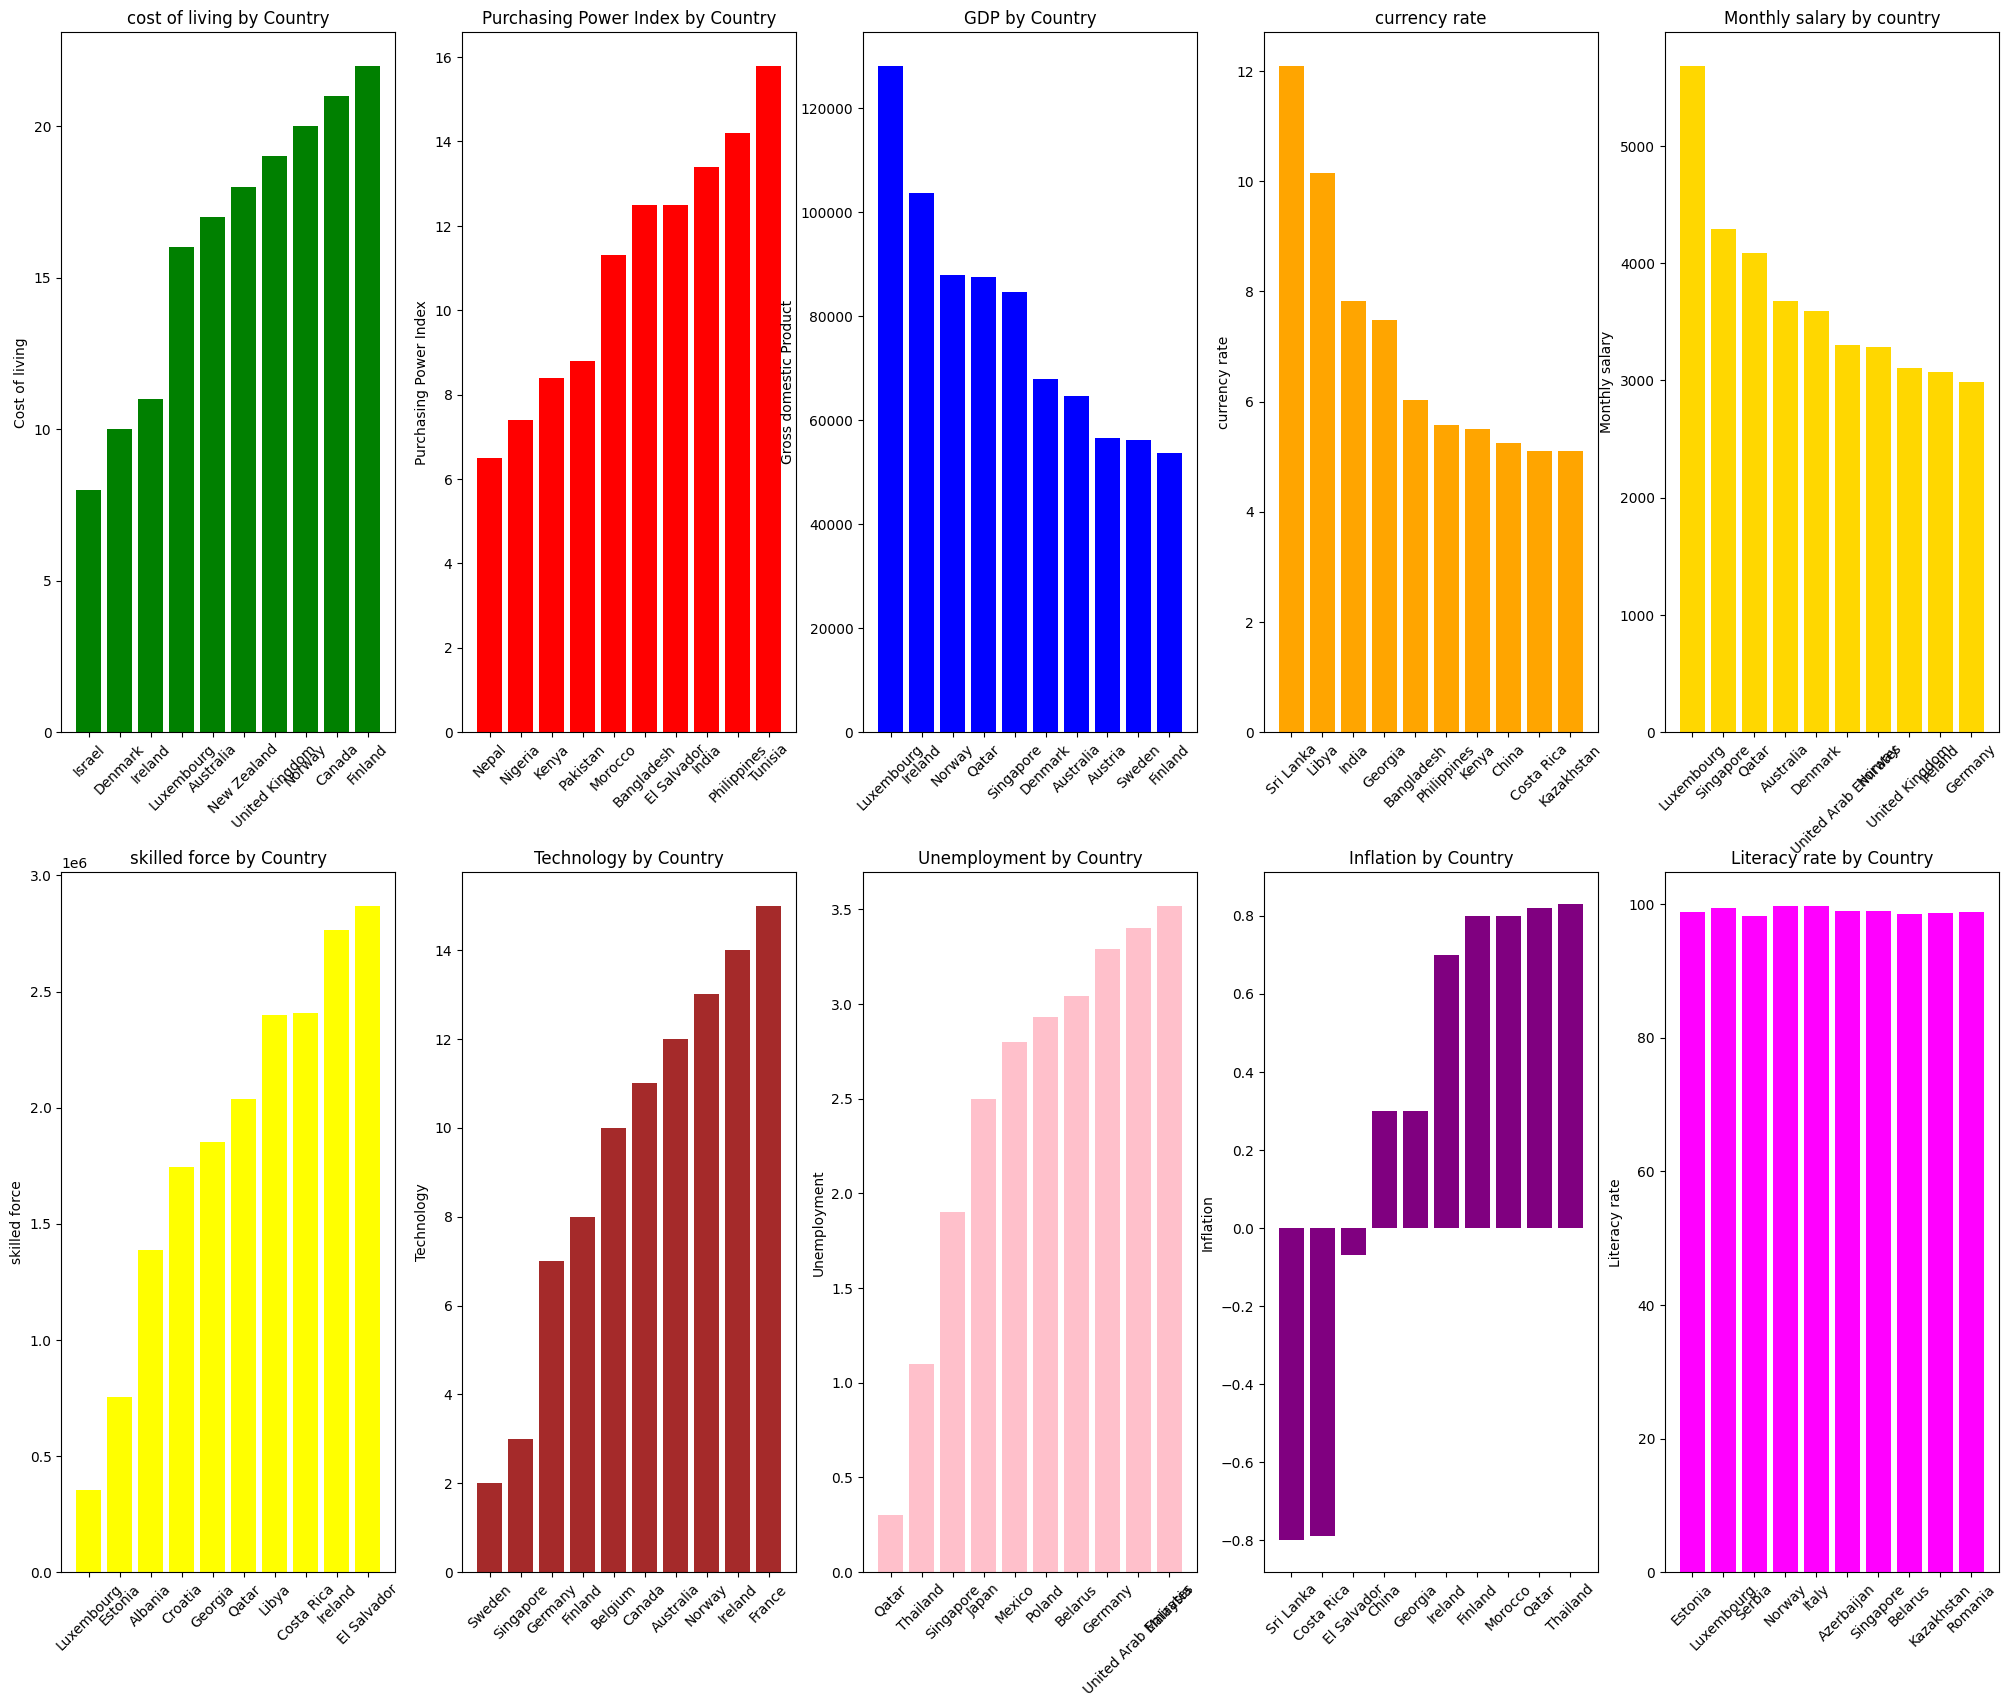

In [1432]:
fig, axes = plt.subplots(2, 5,figsize=(25,20))
axes[0,0].bar(cl['Country'],cl['cost of living'],color='green')
axes[0,0].set_title('cost of living by Country')
axes[0,0].set_ylabel('Cost of living')
axes[0,0].tick_params(axis='x',rotation=45)
axes[0,1].bar(pp['Country'], pp['Purchasing Power Index'], color='red')
axes[0,1].set_title('Purchasing Power Index by Country')
axes[0,1].set_ylabel('Purchasing Power Index')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,2].bar(gdp['Country'], gdp['Gdp'], color='blue')
axes[0,2].set_title('GDP by Country')
axes[0,2].set_ylabel('Gross domestic Product')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,3].bar(cc['Country'], cc['currency rate'], color='orange')
axes[0,3].set_title('currency rate')
axes[0,3].set_ylabel('currency rate')
axes[0,3].tick_params(axis='x', rotation=45)
axes[0,4].bar(p['Country'],p['Monthly salary+Tax(USD)'], color='Gold')
axes[0,4].set_title('Monthly salary by country')
axes[0,4].set_ylabel('Monthly salary')
axes[0,4].tick_params(axis='x', rotation=45)
axes[1,0].bar(sf['Country'], sf['Skilled force'], color='yellow')
axes[1,0].set_title('skilled force by Country')
axes[1,0].set_ylabel('skilled force')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,1].bar(tec['Country'], tec['technology.2023 rank'], color='brown')
axes[1,1].set_title('Technology by Country')
axes[1,1].set_ylabel('Technology')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,2].bar(un['Country'], un['Unemployment(%)'],color='pink')
axes[1,2].set_title('Unemployment by Country')
axes[1,2].set_ylabel('Unemployment')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,3].bar(i['Country'],i['Inflation(%)'],color='purple')
axes[1,3].set_title('Inflation by Country')
axes[1,3].set_ylabel('Inflation')
axes[1,3].tick_params(axis='x', rotation=45)
axes[1,4].bar(l['Country'],i['Literacy rate(%)'],color='magenta')
axes[1,4].set_title('Literacy rate by Country')
axes[1,4].set_ylabel('Literacy rate')
axes[1,4].tick_params(axis='x', rotation=45)



In [1433]:
a=p['Country'].reset_index()
a=a.drop(columns=['index'])
a


,Country
0,Luxembourg
1,Singapore
2,Qatar
3,Australia
4,Denmark
5,United Arab Emirates
6,Norway
7,United Kingdom
8,Ireland
9,Germany


In [1434]:
b=cl['Country'].reset_index()
b=b.drop(columns=['index'])
b

,Country
0,Israel
1,Denmark
2,Ireland
3,Luxembourg
4,Australia
5,New Zealand
6,United Kingdom
7,Norway
8,Canada
9,Finland


In [1435]:
c=gdp['Country'].reset_index()
c=c.drop(columns=['index'])
c

,Country
0,Luxembourg
1,Ireland
2,Norway
3,Qatar
4,Singapore
5,Denmark
6,Australia
7,Austria
8,Sweden
9,Finland


In [1436]:
d=sf['Country'].reset_index()
d=d.drop(columns=['index'])
d

,Country
0,Luxembourg
1,Estonia
2,Albania
3,Croatia
4,Georgia
5,Qatar
6,Libya
7,Costa Rica
8,Ireland
9,El Salvador


In [1437]:
#e=tec['Country'].reset_index()
#e=e.drop(columns=['index'])
#e

In [1438]:
#f=l['Country'].reset_index()
#f=f.drop(columns=['index'])
#f

In [1439]:
from functools import reduce



# Finding a common element
result = list(reduce(set.intersection, map(set, [a.Country, b.Country,c.Country,d.Country])))

# Display Result
print("Common element:\n",result)

Common element:
 ['Luxembourg', 'Ireland']


The analysis reveals that both Luxembourg and Ireland are prominent destinations for migrants, driven by robust economic growth, political stability, and high standards of living. However, distinct factors shape migration to these countries:

Luxembourg:

Migration to Luxembourg is largely influenced by its status as a financial hub and an EU administrative center. The country attracts a highly skilled international workforce, especially in finance, IT, and EU-related sectors.
The multilingual environment and proximity to neighboring countries make Luxembourg appealing, particularly for cross-border workers.
Challenges such as the high cost of housing and limited urban space may slow migration growth, unless policy interventions address these issues.
Ireland:

Ireland’s appeal lies in its tech-centric job market, with multinational corporations driving demand for global talent. The country also benefits from being an English-speaking nation, making it an attractive choice for non-EU migrants.
High levels of immigration correlate with strong economic performance, but rising housing costs and urban infrastructure constraints could impact future inflows.
Ireland’s relatively welcoming immigration policies contribute to diverse migrant demographics, supporting its globalized labor market.
Comparison:

While both countries rely heavily on skilled migration, Luxembourg’s smaller market makes its migration trends more niche, often tied to EU functions and finance.
Ireland’s migration patterns are broader, encompassing both tech and service sectors, with a more diverse pool of migrants due to its cultural and linguistic accessibility.
Future Outlook:

Sustained economic growth and targeted policies to address housing and cost-of-living challenges will be pivotal for both nations to maintain their migration attractiveness.
Luxembourg may continue to thrive as a specialized destination, while Ireland is poised for more significant demographic diversification, particularly in tech-driven regions.